# Setup

In [1]:
import pandas as pd
import seaborn as sns

from src.profiling import profile_velour, load_profile_from_disk
from src.viz import plot_grouped_barchart

from velour.client import Client
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

LOCAL_HOST = "http://localhost:8000"
DATASET_NAME = 'profiling12'

# Run Profiler

In [2]:
client = Client(LOCAL_HOST)

results = profile_velour(
    client=client,
    dataset_name=DATASET_NAME,
    n_image_grid=[10000],
    n_annotation_grid=[10],
    n_label_grid=[2],
    db_container_name= "velour-db-1",
    service_container_name = "velour-service-1",
)

Succesfully connected to http://localhost:8000/.
Profiling _setup_dataset with args {'client': <velour.client.Client object at 0x28118c690>, 'dataset_name': 'profiling12', 'n_images': 10000, 'n_annotations': 10, 'n_labels': 2}


  5%|▌         | 501/10000 [06:12<2:13:01,  1.19it/s]

# Analyze Results

In [21]:
files_to_load = ['profiling10', 'profiling11', 'profiling12']

results = []
for file in files_to_load:
    results += load_profile_from_disk(file)


df = pd.DataFrame.from_records(results)
df['total_runtime_minutes'] = df['total_runtime_seconds'] / 60
df.columns

Index(['client', 'dataset_name', 'n_images', 'n_annotations', 'n_labels',
       'start', 'total_runtime_seconds', 'exception', 'service_memory_usage',
       'service_memory_limit', 'service_cpu_usage', 'service_cpu_usage_kernel',
       'service_cpu_usage_user', 'service_cpu_usage_system',
       'service_cpu_throttled_time', 'service_cpu_usage_perc',
       'db_memory_usage', 'db_memory_limit', 'db_cpu_usage',
       'db_cpu_usage_kernel', 'db_cpu_usage_user', 'db_cpu_usage_system',
       'db_cpu_throttled_time', 'db_cpu_usage_perc', 'total_runtime_minutes'],
      dtype='object')

## Total Runtime

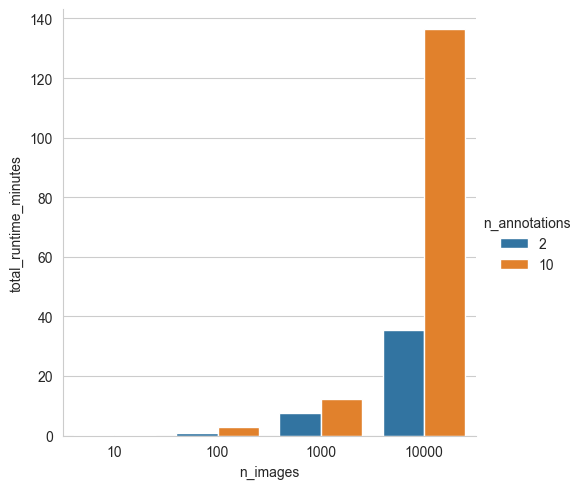

In [23]:
plot_grouped_barchart(df=df, x="n_images", y="total_runtime_minutes", hue='n_annotations')


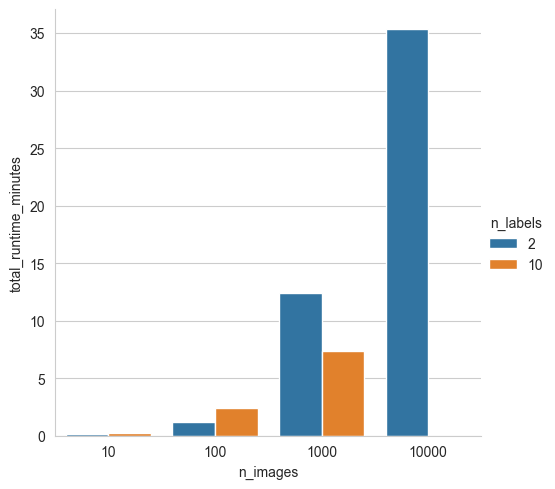

In [20]:
# NOTE: expected to not show any variance yet. need to test different annotation sizes via profiler
plot_grouped_barchart(
    df=df, x="n_images", y="total_runtime_minutes", hue="n_labels"
)

## Docker Stats

### Service Container

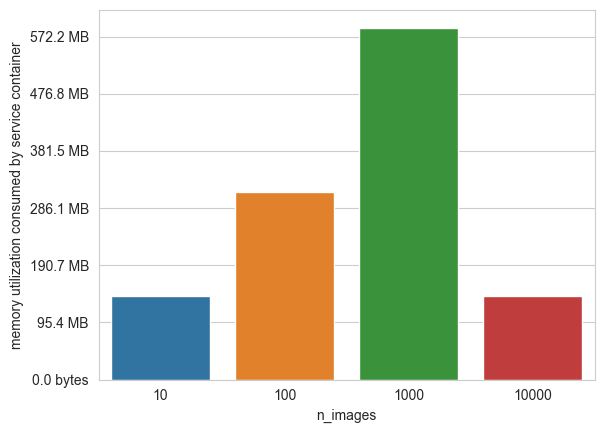

In [9]:
plot_grouped_barchart(df=df, x="n_images", y="service_memory_usage", hue=None, convert_bytes=True, y_axis_label='memory utilization consumed by service container')


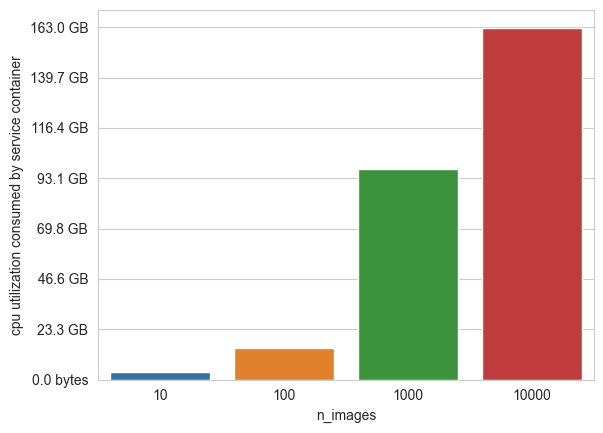

In [10]:
plot_grouped_barchart(df=df, x="n_images", y="service_cpu_usage", hue=None, convert_bytes=True, y_axis_label='cpu utilization consumed by service container')


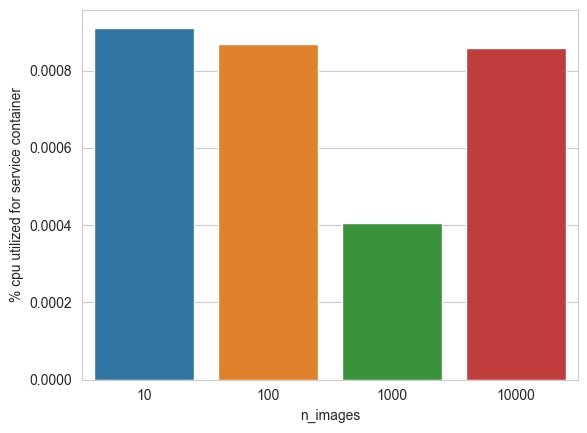

In [14]:
plot_grouped_barchart(df=df, x="n_images", y="service_cpu_usage_perc", hue=None, y_axis_label='% cpu utilized for service container')

### DB Container

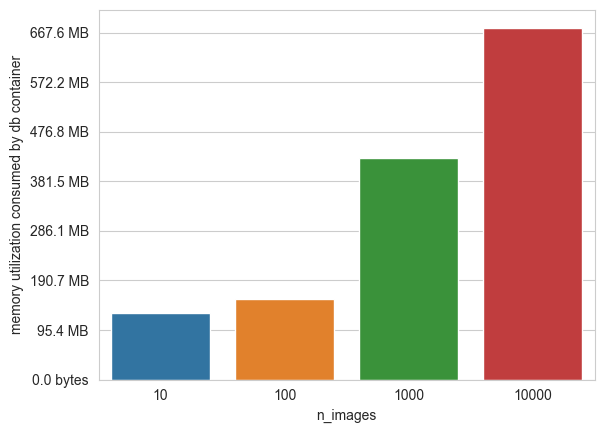

In [9]:
plot_grouped_barchart(df=df, x="n_images", y="dbmemory_usage", hue=None, convert_bytes=True, y_axis_label='memory utilization consumed by db container')

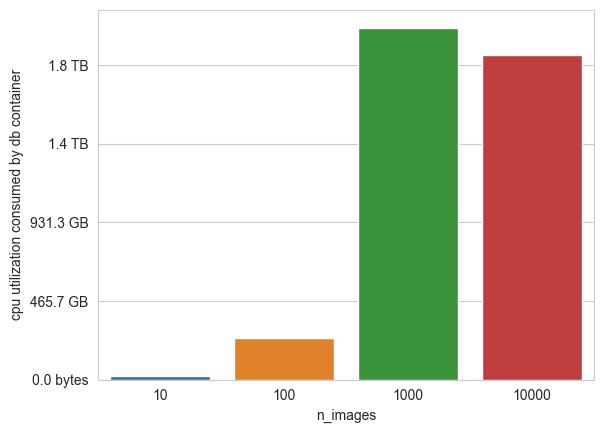

In [16]:
plot_grouped_barchart(df=df, x="n_images", y="db_cpu_usage", hue=None, convert_bytes=True, y_axis_label='cpu utilization consumed by db container')


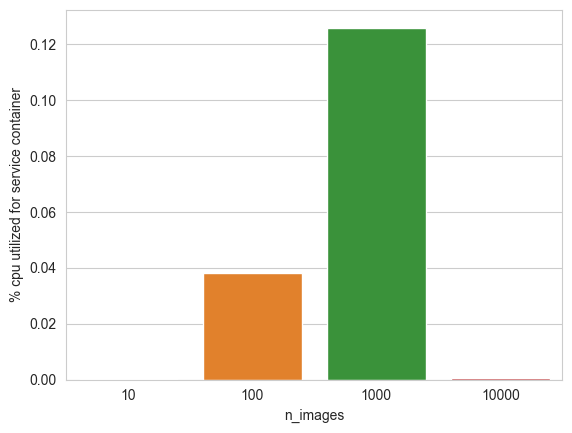

In [15]:
plot_grouped_barchart(df=df, x="n_images", y="db_cpu_usage_perc", hue=None, y_axis_label='% cpu utilized for service container')